In [0]:
a = []
while True:
  a.append('Lot')

In [0]:
! python -m tensorboard.main --logdir=/path/to/logs

2020-05-14 07:52:57.293394: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [0]:
import glob
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import os
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image

tf.__version__


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0'

In [0]:
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
#%tensorflow_version 1.x
from PIL import Image
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.utils.vis_utils import plot_model  #plotting the model structure
from keras import callbacks
from datetime import datetime
import os
import cv2
import string
import numpy as np


from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


from keras import layers        # functional 
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import cv2
import string
import numpy as np

from packaging import version
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


In [0]:
! wget "https://ndownloader.figshare.com/files/22149861" -O samples.tar.gz

--2020-05-14 07:51:40--  https://ndownloader.figshare.com/files/22149861
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.214.52.154, 54.229.212.42, 52.50.181.110, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.214.52.154|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22149861/samples.tar.gz [following]
--2020-05-14 07:51:40--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22149861/samples.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.85.26
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.85.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390645514 (373M) [application/gzip]
Saving to: ‘samples.tar.gz’

samples.tar.gz      100%[===================>] 372.55M  31.2MB/s    in 13s     

2020-05-14 07:51:53 (29.3 MB/s) - ‘samples.tar.gz’ saved [390645514/390645514]

In [0]:
!tar -xvf samples.tar.gz > /dev/null

In [0]:
! mkdir data
! find samples -name '*.*' | xargs mv --target-directory=data

In [0]:
png_files = glob.glob('data/*.png')
print(png_files[0])
print(len(png_files))

data/4393.png
10000


(100, 200, 3)


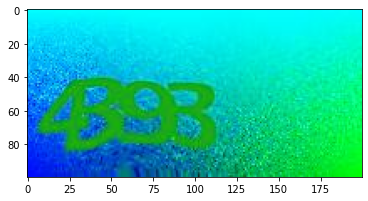

In [0]:
img = cv2.imread(png_files[0],cv2.IMREAD_UNCHANGED)
print(img.shape)
plt.imshow(img)
plt.show()

In [0]:
from tqdm import tqdm
import string
index_ = {}
symbols =  '0123456789' # string.ascii_uppercase + string.ascii_lowercase   +
for item in symbols:
  index_[item] = 0

for item in tqdm(png_files):
  d = str(item.split('/')[1]).split('.')[0]
  #print(d)
  #break
  all_c = str(d)
  for i in all_c:
    # if index_[i] == 0:
    #   index_[i] = 0
    # else:
    index_[i] += 1
print(index_)

100%|██████████| 10000/10000 [00:00<00:00, 417256.49it/s]

{'0': 4000, '1': 4000, '2': 4000, '3': 4000, '4': 4000, '5': 4000, '6': 4000, '7': 4000, '8': 4000, '9': 4000}


In [0]:
index = {}
rev_index = {}
count = 0
for item in index_:
  #print(item)
  if index_[item]>0:
    index[item] = count
    rev_index[count] = item
    count += 1 
print(index)
print(rev_index)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}


In [0]:
plot_ = []
for item in index_:
    plot_.append(index_[item])

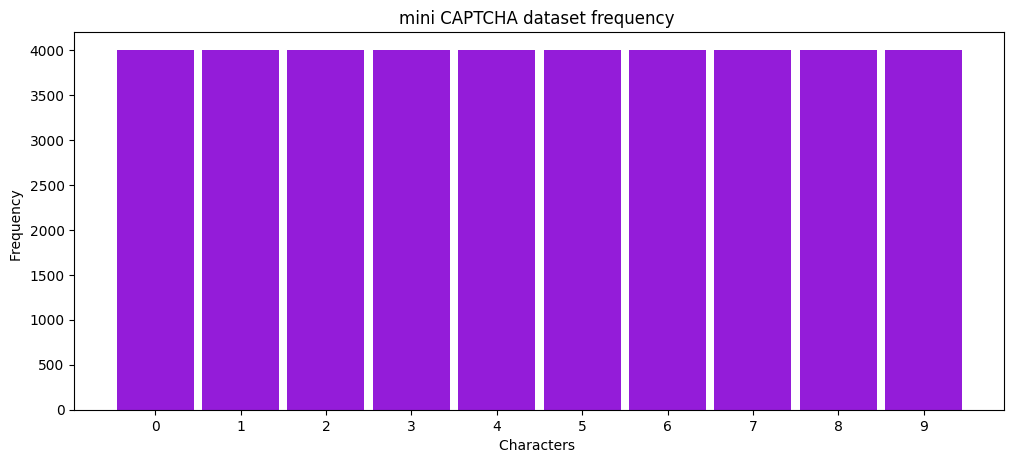

In [0]:
#index
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 5), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index_.keys(), index_.values(), width=0.9, color='#941cd9')
plt.title('mini CAPTCHA dataset frequency ')
plt.xlabel("Characters ", fontsize=10)  
plt.ylabel("Frequency  ", fontsize=10)
#plt.xticks(fontsize=14)  
#plt.yticks(fontsize=14)
plt.show()

In [0]:
len(index)

10

In [0]:
DATA_DIR = 'data'  # 302410 images. validate accuracy: 98.8%
H, W, C = 100, 200, 3
N_LABELS = len(index)
D = 4

In [0]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        #print(filename,"f")
        #label, _ = str(filename.split("/")[1]).split('.')[0]
        #print(label,"l")
        return filename
    except Exception as e:
        print('error to parse %s. %s' % (filepath, e))
        return None, None

In [0]:
# create a pandas data frame of images, age, gender and race
files = glob.glob(os.path.join(DATA_DIR, "*.png"))
attributes = list(map(parse_filepath, files))

df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['label', 'file']
df = df.dropna()
df.head()

,label,file
0,4393,data/4393.png
1,4925,data/4925.png
2,3675,data/3675.png
3,1462,data/1462.png
4,8635,data/8635.png


In [0]:
p = np.random.permutation(len(df))
train_up_to = int(len(df) * 0.90)
train_idx = p[:train_up_to]
test_idx = p[train_up_to:]

# split train_idx further into training and validation set
train_up_to = int(train_up_to * 0.90)
train_idx, valid_idx = train_idx[:train_up_to], train_idx[train_up_to:]

print('train count: %s, valid count: %s, test count: %s' % (
    len(train_idx), len(valid_idx), len(test_idx)))

train count: 8100, valid count: 900, test count: 1000


In [0]:
from tensorflow.keras.utils import to_categorical
from PIL import Image



def get_data_generator(df, indices, for_training, batch_size=16):
    images, labels = [], []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, label = r['file'], r['label']
            im = Image.open(file)
            im = im.resize((W, H))
            im = np.array(im) / 255.0
            images.append(np.array(im))
            labels.append(np.array([np.array(to_categorical(index[i], N_LABELS)) for i in label]))
            if len(images) >= batch_size:
#                 print(np.array(images), np.array(labels))
                yield np.array(images), np.array(labels)
                images, labels = [], []
        if not for_training:
            break

In [0]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

input_layer = tf.keras.Input(shape=(H, W, C))
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(input_layer)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
#x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(D * N_LABELS, activation='softmax')(x)
x = tf.keras.layers.Reshape((D, N_LABELS))(x)

model = tf.keras.models.Model(inputs=input_layer, outputs=x)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 198, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 23, 64)        0     

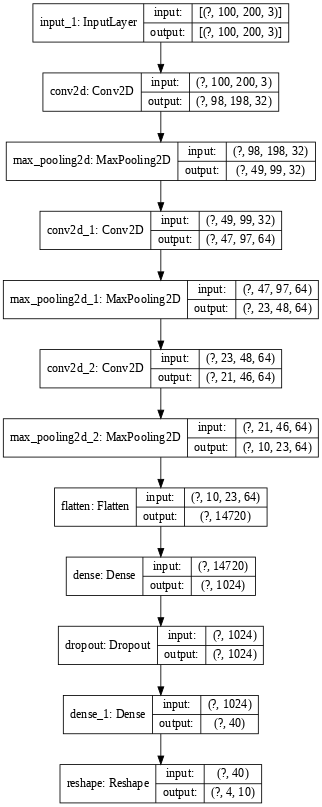

In [0]:
from tensorflow.keras.utils import  plot_model as pm  #plotting the model structure
pm(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60)

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

# batch_size = 100
# valid_batch_size = 32
batch_size = 512
valid_batch_size = 100
train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss')
]
# for storing logs into tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=50,
                    callbacks=[tensorboard_callback,callbacks],
                    validation_data=valid_gen,
                    validation_steps=len(valid_idx)//valid_batch_size)

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 2.3025 - accuracy: 0.1007 WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
15/15 [==============================] - 222s 15s/step - loss: 2.3025 - accuracy: 0.1007 - val_loss: 2.3029 - val_accuracy: 0.0917
Epoch 2/50
15/15 [==============================] - 222s 15s/step - loss: 2.3013 - accuracy: 0.1061 - val_loss: 2.3035 - val_accuracy: 0.0975
Epoch 3/50
15/15 [==============================] - 221s 15s/step - loss: 2.2984 - accuracy: 0.1156 - val_loss: 2.3049 - val_accuracy: 0.0906
Epoch 4/50
15/15 [==============================] - 222s 15s/step - loss:

In [0]:
plt.figure(figsize=(12,7))
legend_acc = []
for item in history.history.keys():
  if item.split('_')[-1:] == ['acc']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(history.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper left')
plt.show()

plt.figure(figsize=(12,7))
legend_acc = []
for item in history.history.keys():
  if item.split('_')[-1:] == ['loss']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(history.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper right')
plt.show()

In [0]:
def  plot_train_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].plot(history.history['accuracy'], label='Train accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend() 

    axes[1].plot(history.history['loss'], label='Training loss')
    axes[1].plot(history.history['val_loss'], label='Validation loss')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()

plot_train_history(history)

In [0]:
# https://www.tensorflow.org/tensorboard/graphs
%load_ext tensorboard
%tensorboard --logdir logs

In [0]:
# download the model in computer for later use

model.save('samples_alexnet_50e.h5')


In [0]:
! cp samples_alexnet_50e.h5 /content/drive/'My Drive'/

In [0]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
dict(zip(model.metrics_names, model.evaluate(test_gen, steps=len(test_idx)//128)))

In [0]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
x_test, y_test = next(test_gen)

y_pred = model.predict_on_batch(x_test)

y_true = tf.math.argmax(y_test, axis=-1)
y_pred = tf.math.argmax(y_pred, axis=-1)

In [0]:
import math
n = 30
random_indices = np.random.permutation(n)
n_cols = 5
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    ax.imshow(x_test[img_idx])
    ax.set_title('pred: {}'.format(
        ''.join(map(str, y_pred[img_idx].numpy()))))
    ax.set_xlabel('true: {}'.format(
        ''.join(map(str, y_true[img_idx].numpy()))))
    ax.set_xticks([])
    ax.set_yticks([])